# **KLasifikasi Biji Kismis Menggunakan Metode Support-Vector Machine (SVM)**

**Data Mining (RB)**

**Kelompok 8**

*  Arfyani Deiastuti (120450006)
*  Alpina Damayanti (120450054)
*  Bintang Annisa Maharani (120450002)
*  Hanna Septiani (120450064)

**Informasi Kumpulan Data:**

Gambar varietas kismis Kecimen dan Besni yang ditanam di Turki diperoleh dengan CVS. Sebanyak 900 butir kismis digunakan, termasuk 450 butir dari kedua varietas. Gambar-gambar ini menjadi sasaran berbagai tahap pra-pemrosesan dan 7 fitur morfologi diekstraksi. Fitur-fitur ini telah diklasifikasikan menggunakan tiga teknik kecerdasan buatan yang berbeda.


**Informasi Atribut:**

*  Area: Memberikan jumlah piksel dalam batas kismis.
*  Perimeter: Ini mengukur lingkungan dengan menghitung jarak antara batas kismis dan piksel di sekitarnya.
*  MajorAxisLength: Memberikan panjang sumbu utama, yang merupakan garis terpanjang yang dapat ditarik pada kismis.
*  MinorAxisLength: Memberikan panjang sumbu kecil, yang merupakan garis terpendek yang dapat ditarik pada kismis.
*  Eksentrisitas: Ini memberikan ukuran eksentrisitas elips, yang memiliki momen yang sama dengan kismis.
*  Area Cembung: Memberikan jumlah piksel kulit cembung terkecil dari wilayah yang dibentuk oleh kismis.
*  Luas: Memberikan rasio wilayah yang dibentuk oleh kismis dengan total piksel dalam kotak pembatas.
*  Kelas: Kecimen dan Besni kismis.

**Kita memulai pemrograman dengan memanggil package yang diperlukan seperti Pandas dan Numpy.**

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# SVM libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report

**Load the Dataset**

In [ ]:
url='https://docs.google.com/spreadsheets/d/1qEem2gri7s3RlhECTDPmAen-Do4CGx2d/edit?usp=share_link&ouid=104094809367657023187&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_excel(url)

In [ ]:
data.shape

(900, 8)

# **Data Cleaning and Exploratory Data Analysis**

In [ ]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


**Rename features**

In [ ]:
data.rename(columns = {"Area": "area", "MajorAxisLength": "major_axis_length",
                       "MinorAxisLength": "minor_axis_length",
                       "Eccentricity": "eccentricity", "ConvexArea": "convex_area",
                       "Extent": "extent", "Perimeter": "perimeter", "Class": "class"}, inplace = True)

In [ ]:
data.head()

,area,major_axis_length,minor_axis_length,eccentricity,convex_area,extent,perimeter,class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


**Check data types and missing values**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               900 non-null    int64  
 1   major_axis_length  900 non-null    float64
 2   minor_axis_length  900 non-null    float64
 3   eccentricity       900 non-null    float64
 4   convex_area        900 non-null    int64  
 5   extent             900 non-null    float64
 6   perimeter          900 non-null    float64
 7   class              900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
data.isnull().sum()

area                 0
major_axis_length    0
minor_axis_length    0
eccentricity         0
convex_area          0
extent               0
perimeter            0
class                0
dtype: int64

**Memeriksa apakah nilai didistribusikan secara merata.**

In [ ]:
data['class'].value_counts()

Kecimen    450
Besni      450
Name: class, dtype: int64

**Check correlation between features**

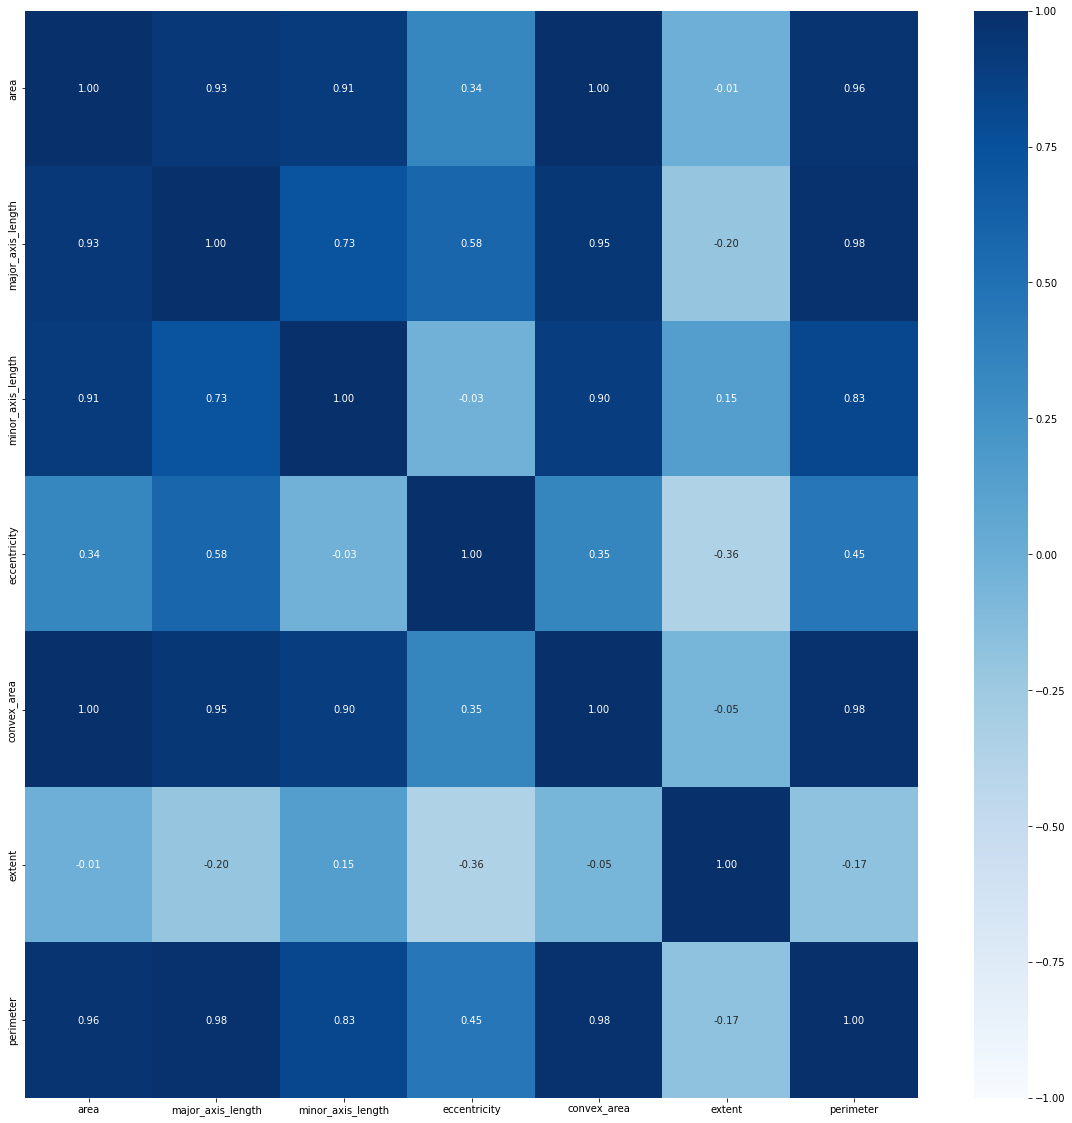

In [ ]:
 # Display correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(),
            annot = True,
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

**Display raisin per type**

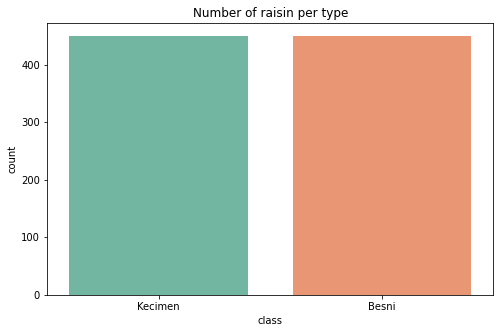

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x = data["class"], palette="Set2")
plt.title("Number of raisin per type")
plt.show()

**Display distribution of values in each feature**

In [ ]:
raisin_features = data.drop(["class"], axis = 1)

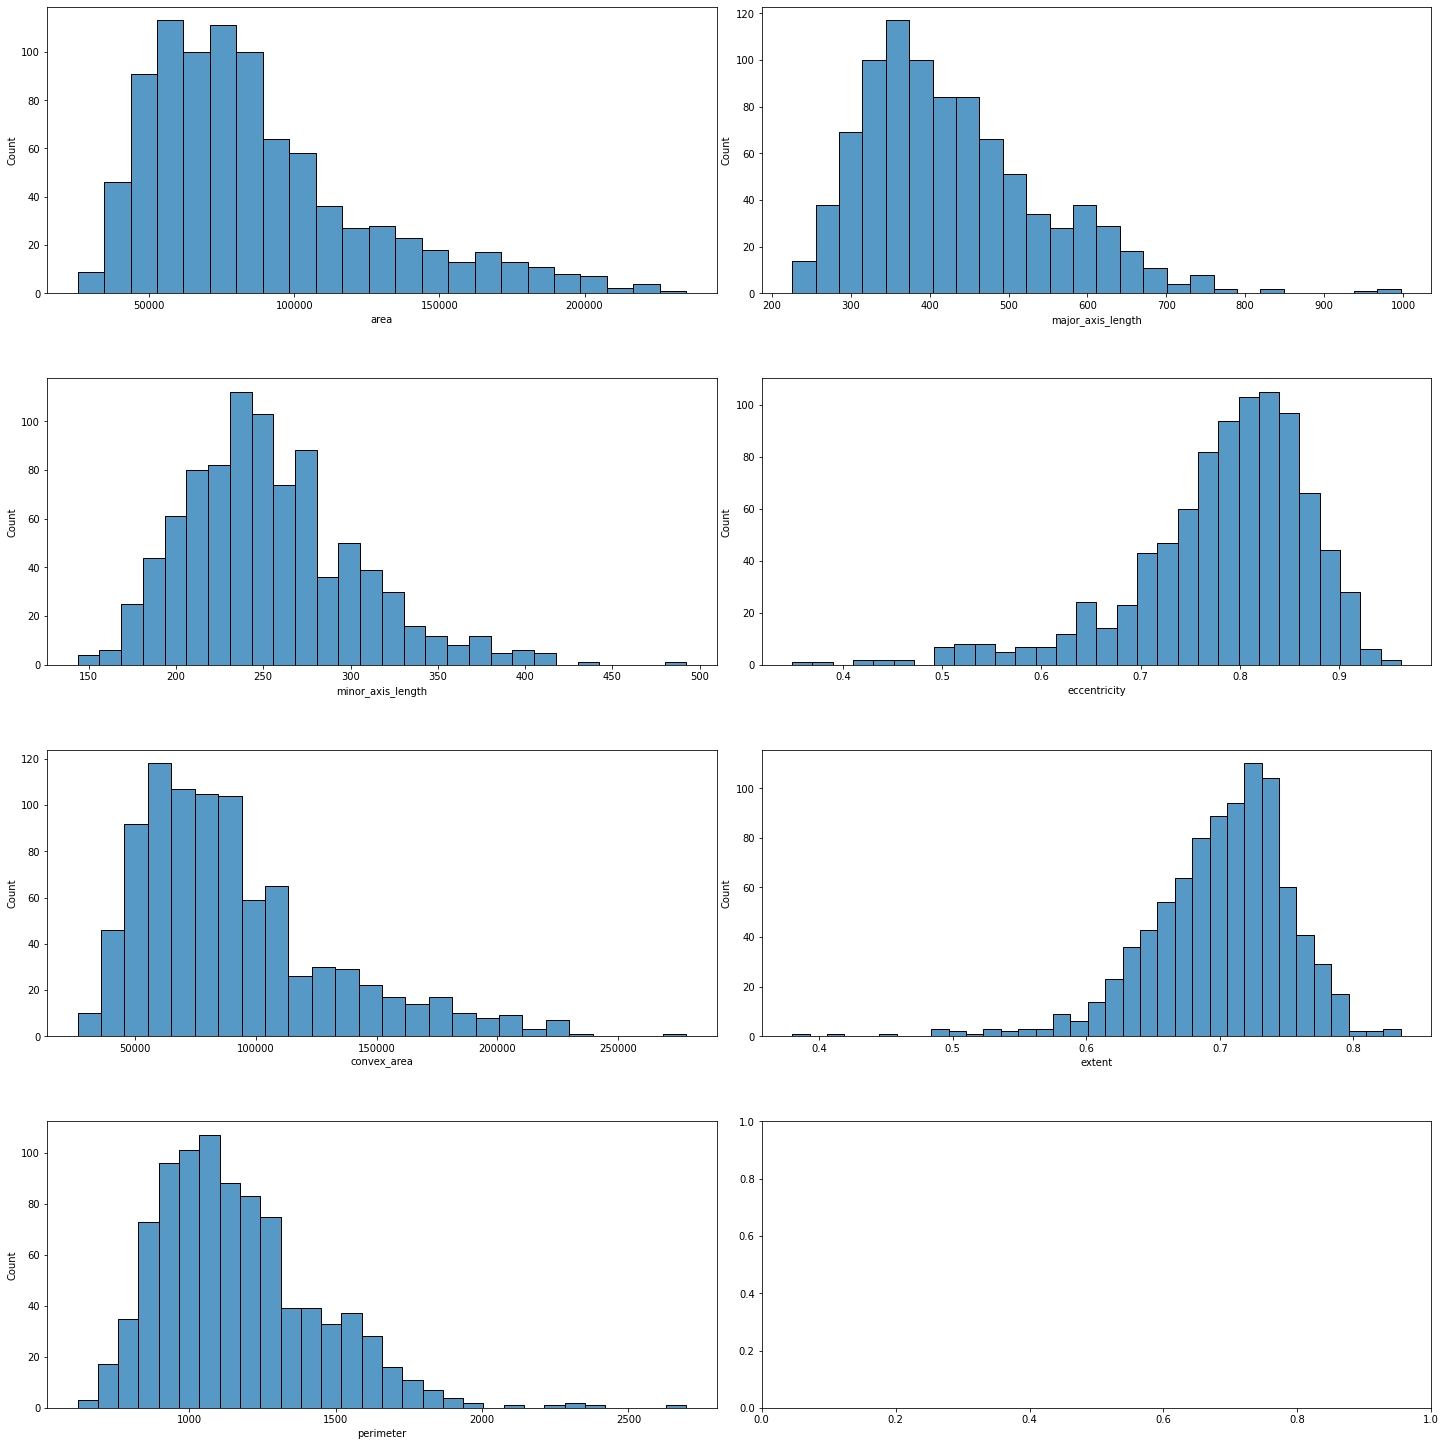

In [ ]:
# Plot features value distribution
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in raisin_features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

**Check for outliers**

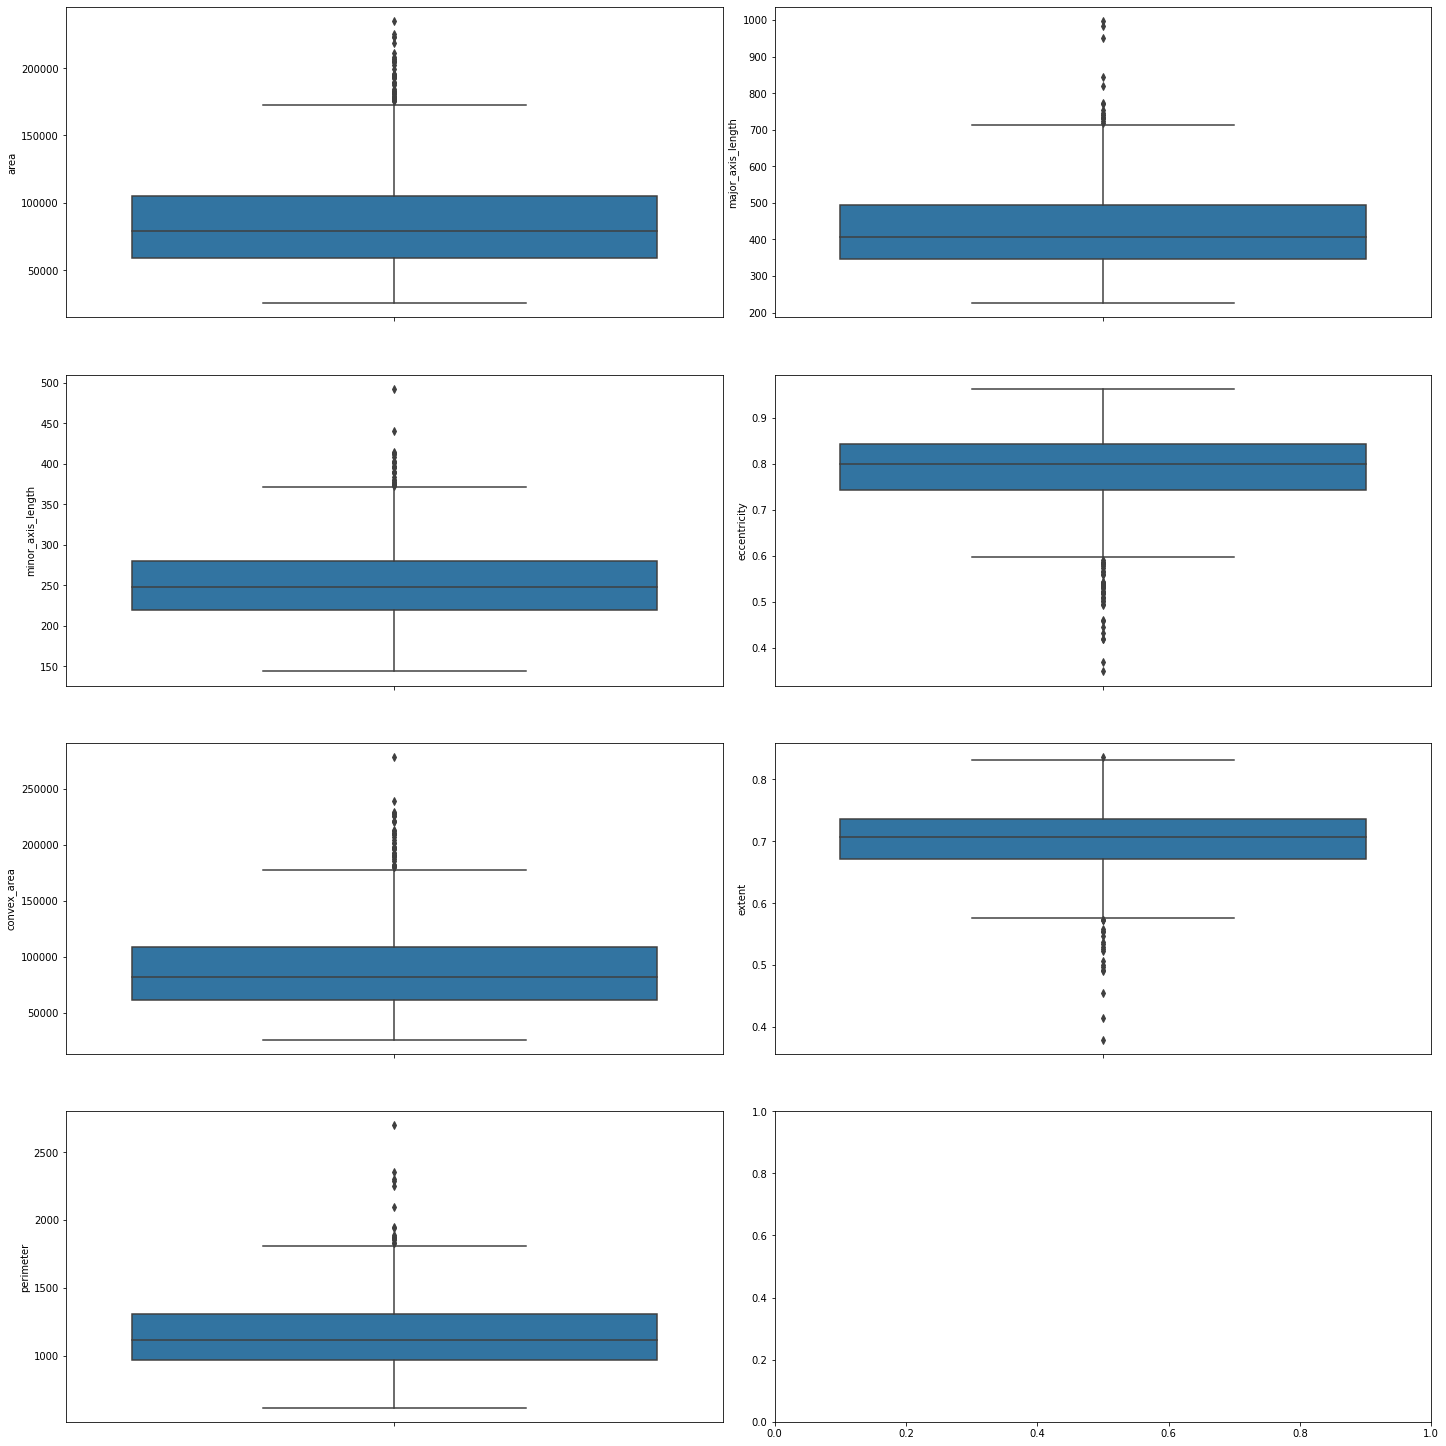

In [ ]:
# Display boxplots per feature
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (20, 20))
idx = 0
axs = axs.flatten()
for k, v in raisin_features.items():
    sns.boxplot(y = k, data = raisin_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

# **Data pre-processing**

**Mengubah nilai kelas menjadi 0 dan 1 dan memastikan setiap kolom numerik.**

In [ ]:
# Convert columns to numeric
data['class'] = data['class'].str.replace('Kecimen', '0')
data['class'] = data['class'].str.replace('Besni', '1')

cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

# Data frame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               900 non-null    int64  
 1   major_axis_length  900 non-null    float64
 2   minor_axis_length  900 non-null    float64
 3   eccentricity       900 non-null    float64
 4   convex_area        900 non-null    int64  
 5   extent             900 non-null    float64
 6   perimeter          900 non-null    float64
 7   class              900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
data

,area,major_axis_length,minor_axis_length,eccentricity,convex_area,extent,perimeter,class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


Train -  test split

In [ ]:
# Data for SVM
X = data
X = X.drop(['class'], axis = 1)
Y = data['class'] # class

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

# **Polynomial Kernel**

In [ ]:
# Parameters for classificator - polynomial kernel
degree = [1,2,3,4,5,6,7,8,9]
degree = np.array(degree)

# Tables to save accuracy - polynomial kernel
Accuracy_CV_poly = np.zeros((10,1))
Accuracy_poly = np.zeros(len(degree))

In [ ]:
# SVM - polynomial kernel
for i in range(0, len(degree)): # degree
    for k in range(1, 10): # Crossvalidation
        # Split data into test and train sets
        X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size = 0.10) # 10 times cs so test_size is 10% of data set

        # Standarization
        sc = StandardScaler()
        sc.fit(X_train_poly)
        X_train_poly = sc.transform(X_train_poly)
        X_test_poly = sc.transform(X_test_poly)
        X_train_poly = pd.DataFrame(X_train_poly)
        X_test_poly = pd.DataFrame(X_test_poly)

        # Model
        svclassifier = SVC(kernel='poly', degree = degree[i])
        svclassifier.fit(X_train_poly, Y_train_poly)

        y_pred_poly = svclassifier.predict(X_test_poly)

        # Accuracy - how many values from y_pred are equal to Y_test
        Accuracy_CV_poly[k] = sum(y_pred_poly == Y_test_poly)/len(Y_test_poly)

    Accuracy_poly[i] = np.mean(Accuracy_CV_poly) # rows - gamma, columns - C

Accuracy_poly # display accuracy table

array([0.79222222, 0.58222222, 0.74555556, 0.59666667, 0.69      ,
       0.60333333, 0.64222222, 0.57777778, 0.62111111])

Text(0, 0.5, 'Accuracy')

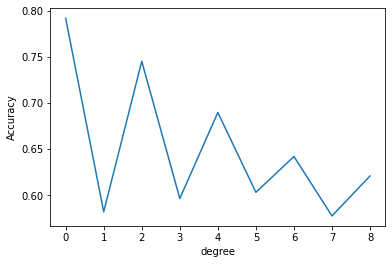

In [ ]:
# polynomial kernel accuracy plot
# axis X - degree
plt.plot(Accuracy_poly)
plt.xlabel('degree')
plt.ylabel('Accuracy')
#plt.xticks(np.arange(len(degree)), degree) # correct axis X ticks

Seperti yang bisa kita lihat, model yang dibangun dengan kernel polinomial tidak memiliki akurasi terbaik.

# **RBF kernel**

In [ ]:
# Parameters for classificator - rbf kernel
gamma = [0.0005, 0.005, 0.01, 0.05, 0.2, 0.8, 1.5, 2.5, 5, 10, 20, 50, 100]
gamma = np.array(gamma)
C = [1, 10, 100, 1000, 10000, 100000]
C = np.array(C)

In [ ]:
# Tables to save accuracy - rbf kernel
Accuracy_CV = np.zeros((10,1))
Accuracy = np.zeros((len(gamma), len(C)))

# SVM - rbf kernel
for i in range(0, len(C)): # C
    for j in range(0, len(gamma)): # gamma
        for k in range(1, 10): # Crossvalidation
            # Split data into test and train sets
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10) # 10 times cs so test_size is 10% of data set

            # Standarization
            sc = StandardScaler()
            sc.fit(X_train)
            X_train = sc.transform(X_train)
            X_test = sc.transform(X_test)
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            # Model
            svclassifier = SVC(kernel = 'rbf', C = C[i], gamma = gamma[j])

            svclassifier.fit(X_train, Y_train)
            y_pred = svclassifier.predict(X_test)

            # Accuracy - how many values from y_pred are equal to Y_test
            Accuracy_CV[k] = sum(y_pred == Y_test)/len(Y_test)

        Accuracy[j,i] = np.mean(Accuracy_CV) # rows - gamma, columns - C

Accuracy # display accuracy table

array([[0.75555556, 0.77666667, 0.76666667, 0.79555556, 0.78      ,
        0.77777778],
       [0.78666667, 0.79333333, 0.78444444, 0.78555556, 0.79444444,
        0.79333333],
       [0.77777778, 0.76888889, 0.79111111, 0.78777778, 0.78333333,
        0.76222222],
       [0.77888889, 0.78555556, 0.75777778, 0.75777778, 0.76333333,
        0.77111111],
       [0.76111111, 0.79      , 0.76333333, 0.77555556, 0.76888889,
        0.75555556],
       [0.76111111, 0.77222222, 0.77666667, 0.72333333, 0.72555556,
        0.71      ],
       [0.77555556, 0.77333333, 0.75444444, 0.71333333, 0.72      ,
        0.70888889],
       [0.76888889, 0.75111111, 0.73666667, 0.71444444, 0.74222222,
        0.74222222],
       [0.75777778, 0.72555556, 0.69      , 0.72      , 0.71444444,
        0.71444444],
       [0.73      , 0.70444444, 0.70777778, 0.68777778, 0.7       ,
        0.71888889],
       [0.69111111, 0.67444444, 0.66111111, 0.67111111, 0.73444444,
        0.68888889],
       [0.63555556, 0

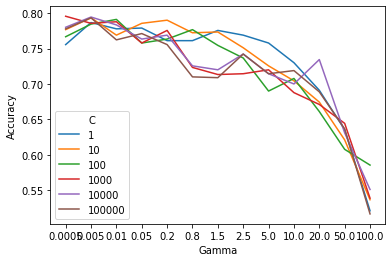

In [ ]:
# rbf kernel accuracy plot
# axis X - gamma, different lines - C
for p in range(0, len(C)): # number of lines = number of C values
    plt.plot(Accuracy[:,p], label = C[p]) # every line plotted separately in order to have a name
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(gamma)), gamma) # correct axis X ticks
plt.legend(title = 'C')

Akurasi turun dengan cepat setelah gamma = 5.0. Nilai C yang lebih besar tidak berarti akurasi yang lebih baik seperti yang terlihat.

Kernel RBF akan diuji sekali lagi. Gamma data kali ini akan ditetapkan sebagai konstanta (gamma = 0,05).

In [ ]:
C = [1, 10, 100, 1000, 10000, 100000]
C = np.array(C)

k_range = 10
Accuracy_CV2 = np.zeros((len(C),2))
Accuracy_rbf2 = np.zeros((k_range,2))
# SVM - rbf kernel - k is outside loop
for k in range(0, k_range):
    # Split data into test and train sets
    X_train_rbf2, X_test_rbf2, Y_train_rbf2, Y_test_rbf2 = train_test_split(X, Y, test_size = k_range/100) # 10 times cs so test_size is 10% of data set

    # Standarization
    sc = StandardScaler()
    sc.fit(X_train_rbf2)
    X_train_rbf2 = sc.transform(X_train_rbf2)
    X_test_rbf2 = sc.transform(X_test_rbf2)
    X_train_rbf2 = pd.DataFrame(X_train_rbf2)
    X_test_rbf2 = pd.DataFrame(X_test_rbf2)

    for i in range(0, len(C)):
        # Model
        svclassifier = SVC(kernel = 'rbf', C = C[i], gamma = 0.05) # gamma constant
        svclassifier.fit(X_train_rbf2, Y_train_rbf2)
        y_pred_rbf2 = svclassifier.predict(X_test_rbf2)

        # Accuracy
        Accuracy_CV2[i,0] = sum(y_pred_rbf2 == Y_test_rbf2)/len(Y_test_rbf2)
        Accuracy_CV2[i,1] = C[i]

    Accuracy_rbf2[k,0] = np.max(Accuracy_CV2[:,0]) # best accuracy
    id_max = np.argmax(Accuracy_CV2[:,0], axis=0)
    Accuracy_rbf2[k,1] = Accuracy_CV2[id_max,1] # C for best acuracy

print("Accuracy table:\n", Accuracy_rbf2) # display accuracy table

Accuracy table:
 [[  0.84444444   1.        ]
 [  0.94444444 100.        ]
 [  0.87777778   1.        ]
 [  0.88888889   1.        ]
 [  0.83333333   1.        ]
 [  0.84444444   1.        ]
 [  0.86666667 100.        ]
 [  0.86666667 100.        ]
 [  0.87777778 100.        ]
 [  0.85555556 100.        ]]


In [ ]:
# Average accuracy
Accuracy_mean = np.mean(Accuracy_rbf2[:,0])
print("Mean accuracy =", Accuracy_mean)

Mean accuracy = 0.8700000000000001


In [ ]:
# Accuracy closest to average accuracy
Accuarcy_roznica = Accuracy_rbf2[:,0] - Accuracy_mean
Accuarcy_roznica = abs(Accuarcy_roznica)
id_min = np.argmin(Accuarcy_roznica, axis=0)
avg_acc_C = Accuracy_rbf2[id_min, 1]
avg_acc = Accuracy_rbf2[id_min, 0]
print("C for value closest to average accuracy:",avg_acc_C)

C for value closest to average accuracy: 100.0


In [ ]:
# Split
X_train_last, X_test_last, Y_train_last, Y_test_last = train_test_split(X, Y, test_size = 0.10) # 10 times cs so test_size is 10% of data set

# Standarization
sc = StandardScaler()
sc.fit(X_train_last)
X_train_last = sc.transform(X_train_last)
X_test_last = sc.transform(X_test_last)
X_train_last = pd.DataFrame(X_train_last)
X_test_last = pd.DataFrame(X_test_last)

# ModelC[i]
svclassifier = SVC(kernel = 'rbf', C = avg_acc_C, gamma = 0.05)

svclassifier.fit(X_train_last, Y_train_last)
y_pred_last = svclassifier.predict(X_test_last)

# Accuracy - how many values from y_pred are equal to Y_test
Accuracy_CV_last = sum(y_pred_last == Y_test_last)/len(Y_test_last)
print("Accuracy:", Accuracy_CV_last)

Accuracy: 0.8777777777777778


In [ ]:
print(classification_report(Y_test_last, y_pred_last, target_names=['Besni', 'Kecimen']))

              precision    recall  f1-score   support

       Besni       0.84      0.93      0.88        45
     Kecimen       0.93      0.82      0.87        45

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [ ]:
cm = confusion_matrix(Y_test_last,y_pred_last)
print("confusion matrix:")
print(cm)

confusion matrix:
[[42  3]
 [ 8 37]]


In [ ]:
Y_train_pred=svclassifier.predict(X_train_last)

print(accuracy_score(Y_test_last,y_pred_last))
print(accuracy_score(Y_train_last,Y_train_pred))

0.8777777777777778
0.8814814814814815


# **Percobaan lain**

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# **Linear Kernal**

In [ ]:
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)

score_accuration = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", score_accuration)
print(report)
print("confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8444444444444444
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       123
           1       0.88      0.82      0.85       147

    accuracy                           0.84       270
   macro avg       0.84      0.85      0.84       270
weighted avg       0.85      0.84      0.84       270

confusion matrix:
[[107  26]
 [ 16 121]]


Dari hasil dapat dilihat nilai kinerja dari penggunaan metode SVM dengan menghitung nilai precision, recall, dan accuracy. Dimana pada class 0 untuk precision dengan nilai 0.80 recall dengan nilai 0.87, dan fscore dengan nilai 0.84.

Sedangkan pada class 1 untuk precision dengan nilai 0.88, recall dengan nilai 0.82, dan fscore dengan nilai 0.85. 

Hasil pada akurasi model sudah mencapai tingkat yang cukup baik yaitu 84%.

sedangkan berdasarkan matriksnya, 107 bernilai benar dan 26 bernilai salah.
selanjutnya 16 bernilai salah dan 121 bernilai benar.

In [ ]:
Y_train_pred=svc.predict(X_train)

print(accuracy_score(Y_test,Y_pred))
print(accuracy_score(Y_train,Y_train_pred))

0.8444444444444444
0.8650793650793651


# **RBF Kernel**

In [ ]:
svc = SVC(kernel='rbf', C=1, probability=True)
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)

score_accuration = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", score_accuration)
print(report)
print("confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8111111111111111
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       160
           1       0.72      0.89      0.79       110

    accuracy                           0.81       270
   macro avg       0.81      0.82      0.81       270
weighted avg       0.83      0.81      0.81       270

confusion matrix:
[[121  12]
 [ 39  98]]


Dari hasil dapat dilihat nilai kinerja dari penggunaan metode SVM dengan menghitung nilai precision, recall, dan accuracy. Dimana pada class 0 untuk precision dengan nilai 0.91 recall dengan nilai 0.76, dan fscore dengan nilai 0.83.

Sedangkan pada class 1 untuk precision dengan nilai 0.72, recall dengan nilai 0.89, dan fscore dengan nilai 0.79. 

Hasil pada akurasi model sudah mencapai tingkat yang cukup baik yaitu 81%.

sedangkan berdasarkan matriksnya, 121 bernilai benar dan 12 bernilai salah.
selanjutnya 39 bernilai salah dan 98 bernilai benar.

In [ ]:
Y_train_pred=svc.predict(X_train)

print(accuracy_score(Y_test,Y_pred))
print(accuracy_score(Y_train,Y_train_pred))

0.8111111111111111
0.8222222222222222


# **Poly Kernel**

In [ ]:
svc = SVC(kernel='poly', C=1, probability=True)
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)

score_accuration = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", score_accuration)
print(report)
print("confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.7925925925925926
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       165
           1       0.68      0.89      0.77       105

    accuracy                           0.79       270
   macro avg       0.79      0.81      0.79       270
weighted avg       0.82      0.79      0.80       270

confusion matrix:
[[121  12]
 [ 44  93]]


Dari hasil dapat dilihat nilai kinerja dari penggunaan metode SVM dengan menghitung nilai precision, recall, dan accuracy. Dimana pada class 0 untuk precision dengan nilai 0.91 recall dengan nilai 0.73, dan fscore dengan nilai 0.81.

Sedangkan pada class 1 untuk precision dengan nilai 0.68, recall dengan nilai 0.89, dan fscore dengan nilai 0.77. 

Hasil pada akurasi model sudah mencapai tingkat yang cukup baik yaitu 79%.

sedangkan berdasarkan matriksnya, 121 bernilai benar dan 12 bernilai salah.
selanjutnya 44 bernilai salah dan 93 bernilai benar.

In [ ]:
Y_train_pred=svc.predict(X_train)

print(accuracy_score(Y_test,Y_pred))
print(accuracy_score(Y_train,Y_train_pred))

0.7925925925925926
0.8206349206349206


# **Sigmoid Kernel**

In [ ]:
svc = SVC(kernel='sigmoid', C=1, probability=True)
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)

score_accuration = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", score_accuration)
print(report)
print("confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.2111111111111111
              precision    recall  f1-score   support

           0       0.18      0.19      0.18       128
           1       0.24      0.23      0.24       142

    accuracy                           0.21       270
   macro avg       0.21      0.21      0.21       270
weighted avg       0.21      0.21      0.21       270

confusion matrix:
[[ 24 109]
 [104  33]]


Dari hasil dapat dilihat nilai kinerja dari penggunaan metode SVM dengan menghitung nilai precision, recall, dan accuracy. Dimana pada class 0 untuk precision dengan nilai 0.18 recall dengan nilai 0.19, dan fscore dengan nilai 0.18.

Sedangkan pada class 1 untuk precision dengan nilai 0.24, recall dengan nilai 0.23, dan fscore dengan nilai 0.24. 

Hasil pada akurasi model sudah mencapai tingkat yang kurang baik yaitu 21%.

sedangkan berdasarkan matriksnya, 24 bernilai benar dan 109 bernilai salah.
selanjutnya 104 bernilai salah dan 33 bernilai benar.

In [ ]:
Y_train_pred=svc.predict(X_train)

print(accuracy_score(Y_test,Y_pred))
print(accuracy_score(Y_train,Y_train_pred))

0.2111111111111111
0.22063492063492063


# **Kesimpulan**

Dari keempat jenis kernel, kernel terbaik dalah linear kernel dengan nilai akurasi tertinggi yaitu 84%.